In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-large",
  device_map="cuda",
  torch_dtype=torch.bfloat16,
)

df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")

# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["#Passengers"])
prediction_length = 12
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["#Passengers"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()


/home/bruno/.virtualenvs/ia_tests/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/bruno/.virtualenvs/ia_tests/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


RuntimeError: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero.

In [3]:
torch.cuda.is_available()

/home/bruno/.virtualenvs/ia_tests/lib/python3.10/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


False

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline


/home/bruno/.virtualenvs/ia_tests/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
torch.cuda.is_available()

True

In [31]:
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-large",
  device_map="cuda",
  torch_dtype=torch.bfloat16,
)

/home/bruno/.virtualenvs/ia_tests/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [22]:
df = pd.read_excel("/home/bruno/OneDrive/PLATAFORMA RBA IMOB/Base de Dados/1_bronze/bronze_auxiliary_data/df_demanda2024_06_12.xlsx")


In [23]:
df.shape

(171, 12)

In [26]:
df.loc[171,"Mes_Ano"]=5860

In [15]:
df.loc[:86,"quant_imov_itbi"]

0     2292
1     2530
2     3233
3     2917
4     3673
      ... 
82    4508
83    4646
84    3562
85    3964
86    4704
Name: quant_imov_itbi, Length: 87, dtype: int64

In [35]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df.loc[:171,"quant_imov_itbi"])
prediction_length = 12
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df.loc[:171,"quant_imov_itbi"]), len(df.loc[:171,"quant_imov_itbi"]) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)


In [37]:
median

array([5238.32176679, 5253.46141085, 5177.76319057, 5389.71845352,
       5041.50639406, 5162.62354651, 4905.24959756, 5162.62354651,
       4148.26641008, 4178.54569819, 4874.97006328, 4814.41124088])

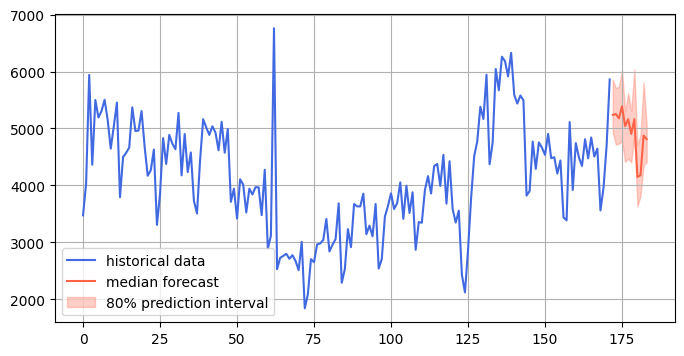

In [36]:
plt.figure(figsize=(8, 4))
plt.plot(df.loc[:171,"quant_imov_itbi"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()


array([11545, 14317, 13805, 13494, 14760, 13493, 14206, 13539, 13869,
       10686, 11966, 14444])

In [40]:
low, median, high

(array([11864.40605469, 12992.12480469]),
 array([13012.14355469, 14513.54443359]),
 array([13632.72177734, 14833.84287109]))

In [10]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(df.loc[75:,"quant_imov_itbi"].to_numpy(), median)

0.06912524358369107